<a href="https://colab.research.google.com/github/itimes-digital/plots/blob/master/estudo_recursos_pandas_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Carregamento de dataset da seaborn

In [4]:
base = sns.load_dataset('mpg')
base

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Criando um novo conjunto de dados onde o índice são os valores da coluna '**origin**' e os valores da coluna '**model_year**' são as novas colunas, com o resultado da soma da frequência de cada valor da coluna '**model_year**'

In [0]:
new_base_v1 = pd.crosstab(index=base['origin'], columns=base['model_year'])
new_base_v1

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,5,4,5,7,6,6,8,4,6,4,9,4,2
japan,2,4,5,4,6,4,4,6,8,2,13,12,9
usa,22,20,18,29,15,20,22,18,22,23,7,13,20


In [0]:
new_base_v1.shape

(3, 13)

O mesmo procedimento acima para criação de novo dataframa com a chamada da função média para os valores da coluna '**mpg**'

In [0]:
new_base_v2 = pd.crosstab(index=base['origin'], columns = base['model_year'], values = base['mpg'], aggfunc = 'mean')
new_base_v2

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,25.200000,28.75,22.000000,24.000000,27.000000,24.50,24.250000,29.250000,24.950000,30.450000,37.288889,31.575000,40.000000
japan,25.500000,29.50,24.200000,20.000000,29.333333,27.50,28.000000,27.416667,29.687500,32.950000,35.400000,32.958333,34.888889
usa,15.272727,18.10,16.277778,15.034483,18.333333,17.55,19.431818,20.722222,21.772727,23.478261,25.914286,27.530769,29.450000


Procedimento para uma origem com o intuito de comprovar o cálculo da média da coluna '**mpg**' para a origem Japão.

In [0]:
base_japan = base.loc[base['origin'] == 'japan']
base_japan = base_japan.loc[base_japan['model_year'] == 70]
base_japan

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
14,24.0,4,113.0,95.0,2372,15.0,70,japan,toyota corona mark ii
18,27.0,4,97.0,88.0,2130,14.5,70,japan,datsun pl510


In [0]:
base_japan['mpg'].mean()

25.5

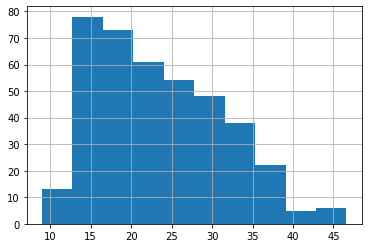

In [0]:
base['mpg'].hist()

In [13]:
pd.cut(x = base['mpg'], bins = 4, labels = [1,2, 3, 4])

0      1
1      1
2      1
3      1
4      1
      ..
393    2
394    4
395    3
396    3
397    3
Name: mpg, Length: 398, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [14]:
base['mpg_bin'] = pd.cut(x = base['mpg'], bins = 4, labels = [1,2, 3, 4])
base[['mpg', 'mpg_bin']]

,mpg,mpg_bin
0,18.0,1
1,15.0,1
2,18.0,1
3,16.0,1
4,17.0,1
...,...,...
393,27.0,2
394,44.0,4
395,32.0,3
396,28.0,3


In [36]:
base_mpg_bin = base.iloc[:, 9:10]
print("Soma do mpg_bin = 1 : " + str(base_mpg_bin.query('mpg_bin == 1').count()))
print("Soma do mpg_bin = 2 : " + str(base_mpg_bin.query('mpg_bin == 2').count()))
print("Soma do mpg_bin = 3 : " + str(base_mpg_bin.query('mpg_bin == 3').count()))
print("Soma do mpg_bin = 4 : " + str(base_mpg_bin.query('mpg_bin == 4').count()))

Soma do mpg_bin = 1 : mpg_bin    127
dtype: int64
Soma do mpg_bin = 2 : mpg_bin    152
dtype: int64
Soma do mpg_bin = 3 : mpg_bin    100
dtype: int64
Soma do mpg_bin = 4 : mpg_bin    19
dtype: int64


In [37]:
pd.qcut(x = base['mpg'], q = 4, labels = [1, 2, 3, 4])

0      2
1      1
2      2
3      1
4      1
      ..
393    3
394    4
395    4
396    3
397    4
Name: mpg, Length: 398, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

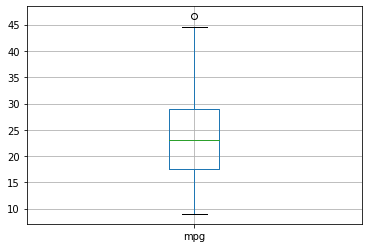

In [41]:
base.boxplot(column=['mpg'])

In [43]:
base['mpg_qcut'] = pd.qcut(x = base['mpg'], q = 4, labels = [1,2,3,4])
base[['mpg', 'mpg_bin', 'mpg_qcut']]

,mpg,mpg_bin,mpg_qcut
0,18.0,1,2
1,15.0,1,1
2,18.0,1,2
3,16.0,1,1
4,17.0,1,1
...,...,...,...
393,27.0,2,3
394,44.0,4,4
395,32.0,3,4
396,28.0,3,3


In [49]:
print('Média : ' + str(base['mpg'].mean()))
print('Mediana : ' + str(base['mpg'].median()))
base.query('mpg == 23.0')

Média : 23.514572864321615
Mediana : 23.0


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_bin,mpg_qcut
49,23.0,4,122.0,86.0,2220,14.0,71,usa,mercury capri 2000,2,2
59,23.0,4,97.0,54.0,2254,23.5,72,europe,volkswagen type 3,2,2
82,23.0,4,120.0,97.0,2506,14.5,72,japan,toyouta corona mark ii (sw),2,2
101,23.0,6,198.0,95.0,2904,16.0,73,usa,plymouth duster,2,2
168,23.0,4,140.0,83.0,2639,17.0,75,usa,ford pinto,2,2
170,23.0,4,140.0,78.0,2592,18.5,75,usa,pontiac astro,2,2
177,23.0,4,115.0,95.0,2694,15.0,75,europe,audi 100ls,2,2
178,23.0,4,120.0,88.0,2957,17.0,75,europe,peugeot 504,2,2
298,23.0,8,350.0,125.0,3900,17.4,79,usa,cadillac eldorado,2,2
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl,2,2


In [51]:
origin_dummies = pd.get_dummies(base['origin'])
origin_dummies

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


Insere as colunas lado a lado respeitando o índice original com axis = 1

In [56]:
pd.concat(objs = [base['mpg'], origin_dummies], axis = 1)

,mpg,europe,japan,usa
0,18.0,0,0,1
1,15.0,0,0,1
2,18.0,0,0,1
3,16.0,0,0,1
4,17.0,0,0,1
...,...,...,...,...
393,27.0,0,0,1
394,44.0,1,0,0
395,32.0,0,0,1
396,28.0,0,0,1


Insere as colunas lado a lado porém não segue o índice original com axis = 0, ocasionando valores NaN para os índices pré-existentes.

In [55]:
pd.concat(objs = [base['mpg'], origin_dummies], axis = 0)

,0,europe,japan,usa
0,18.0,NaN,NaN,NaN
1,15.0,NaN,NaN,NaN
2,18.0,NaN,NaN,NaN
3,16.0,NaN,NaN,NaN
4,17.0,NaN,NaN,NaN
...,...,...,...,...
393,NaN,0.0,0.0,1.0
394,NaN,1.0,0.0,0.0
395,NaN,0.0,0.0,1.0
396,NaN,0.0,0.0,1.0


In [0]:
sns.set(style="ticks")

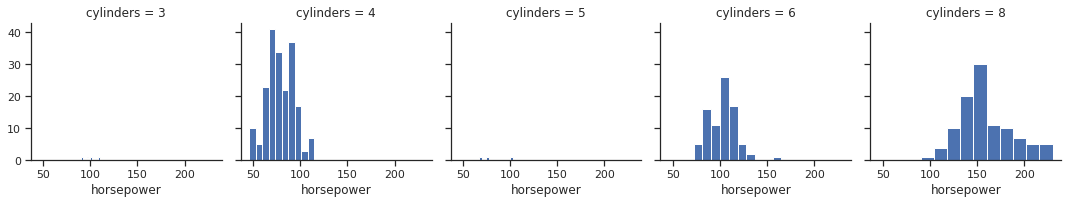

In [69]:
g = sns.FacetGrid(base, col="cylinders")
g.map(plt.hist, 'horsepower')

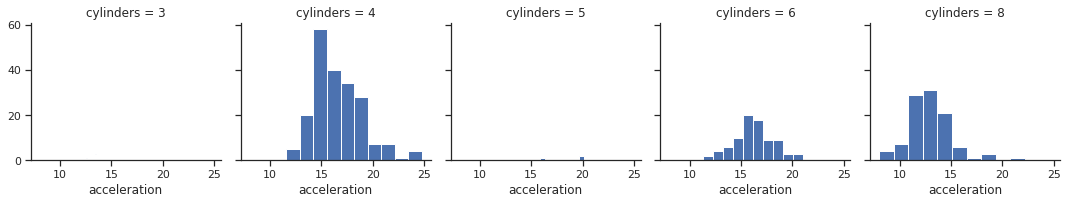

In [70]:
g = sns.FacetGrid(base, col="cylinders")
g.map(plt.hist, 'acceleration')

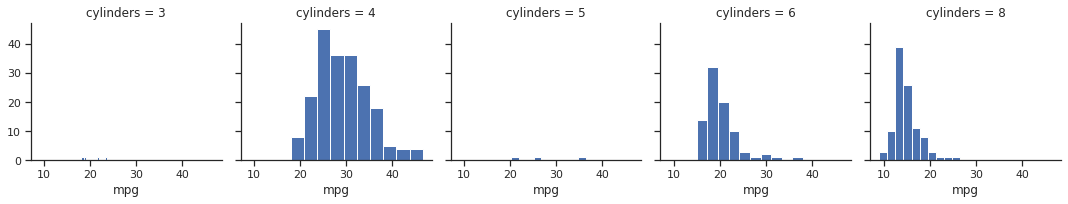

In [71]:
g = sns.FacetGrid(base, col="cylinders")
g.map(plt.hist, 'mpg')

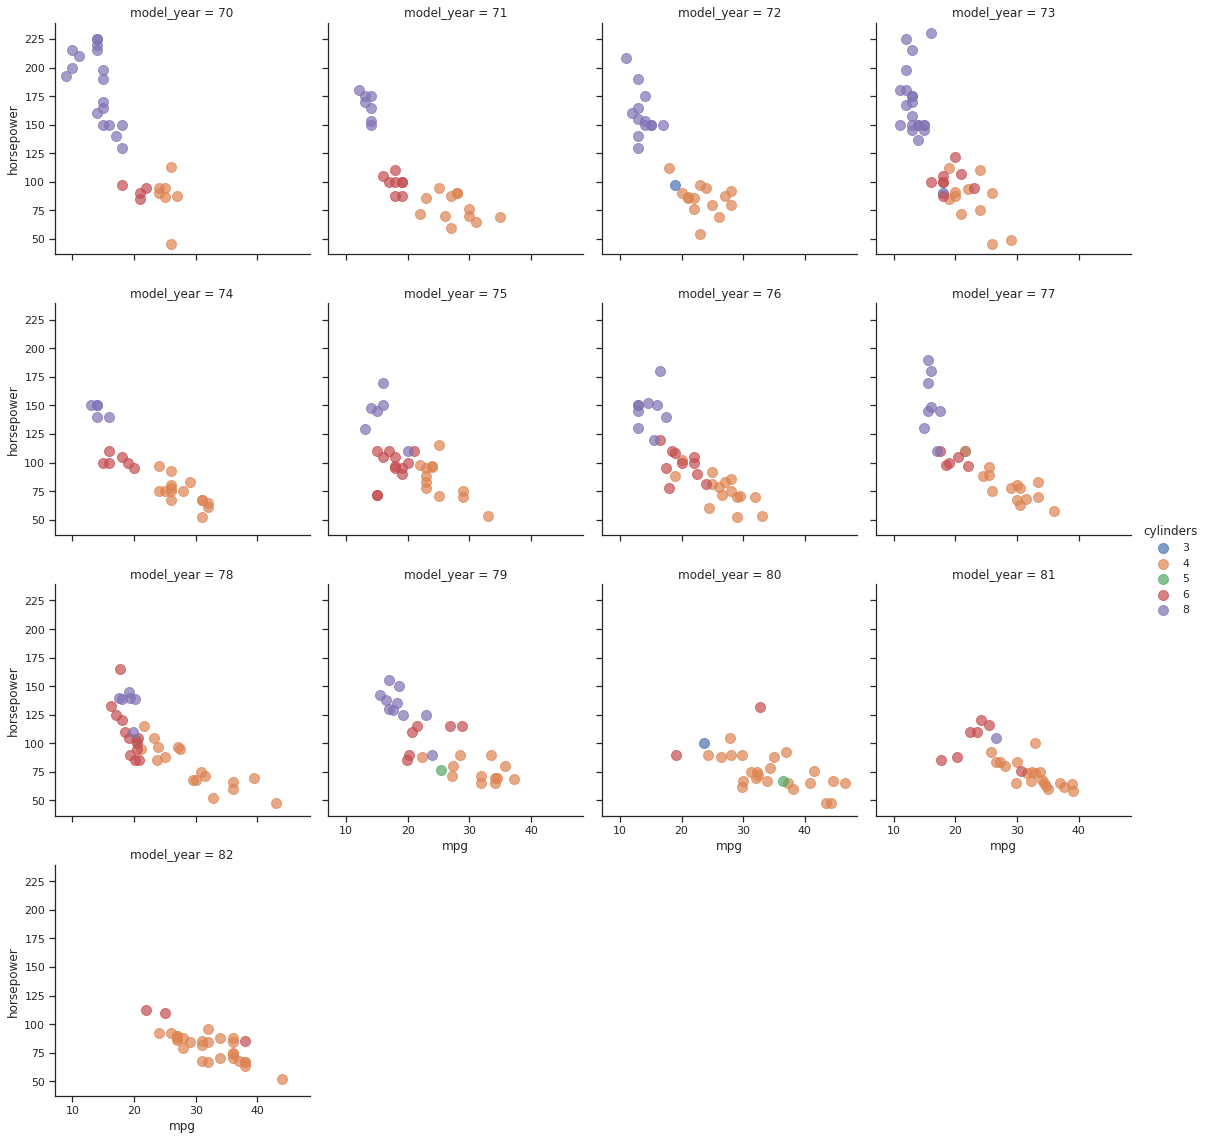

In [85]:
g = sns.FacetGrid(base, col = "model_year", hue="cylinders", col_wrap=4, height=4, margin_titles=True)
g.map(plt.scatter, "mpg", "horsepower", alpha=.7, s = 100)
g.add_legend();

In [106]:
base_80 = base.query('model_year > 80')
base_80.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_bin,mpg_qcut
338,27.2,4,135.0,84.0,2490,15.7,81,usa,plymouth reliant,2,3
339,26.6,4,151.0,84.0,2635,16.4,81,usa,buick skylark,2,3
340,25.8,4,156.0,92.0,2620,14.4,81,usa,dodge aries wagon (sw),2,3
341,23.5,6,173.0,110.0,2725,12.6,81,usa,chevrolet citation,2,3
342,30.0,4,135.0,84.0,2385,12.9,81,usa,plymouth reliant,3,4
343,39.1,4,79.0,58.0,1755,16.9,81,japan,toyota starlet,4,4
344,39.0,4,86.0,64.0,1875,16.4,81,usa,plymouth champ,4,4
345,35.1,4,81.0,60.0,1760,16.1,81,japan,honda civic 1300,3,4
346,32.3,4,97.0,67.0,2065,17.8,81,japan,subaru,3,4
347,37.0,4,85.0,65.0,1975,19.4,81,japan,datsun 210 mpg,3,4


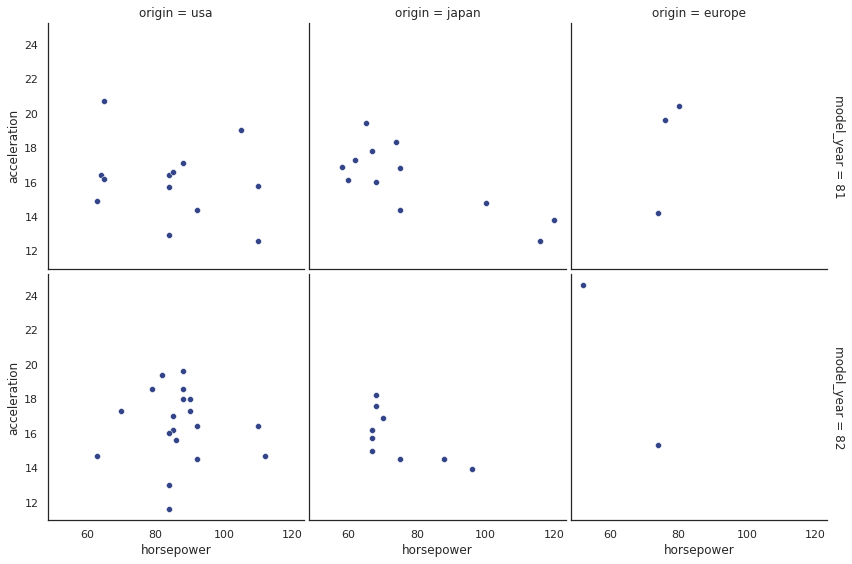

In [109]:
with sns.axes_style("white"):
  g = sns.FacetGrid(base_80, row="model_year", col="origin", margin_titles=True, height=4)

g.map(plt.scatter, "horsepower", "acceleration", color="#334488", edgecolor="white", lw=.5);
g.fig.subplots_adjust(wspace=.02, hspace=.02);